# **Week 6 Solutions**

### Please have a good hard go at your challenge questions before looking through these solutions.

### Here is a bit of motivation cat for you to give those challenges your best shot.

## **You've got this!**

![motivation-cat](../resources/images/MotivationCat.png)


In [75]:
%run "week6_test.ipynb"

# **Challenge Question 1**
A university professor is trying to determine what factors impact the grades of his students (known as 'Performance'). So he created a dataframe that contains information about each of his students that he thought would be contributing factors to their performance. Your task is to analyse this dataset and create a linear regression model that best predicts the 'Performance' of each student. 

You will have to do the following:
1. Create visualisations of the dataset. 
2. Determine if multicollinearity is present and make justifications on which features you will use for your model.
3. Split the dataset into the features and predictor
4. Split the features and predictor into training and testing
5. Select and train a linear regression model
6. Create visualisations of the model predictions and justify how well the model performed

In [76]:
challenge_df.head()

,HoursStudied,PrevScore,HoursSleep,PracticeExamHrs,LivingAtHome,HoursExercising,Performance
0,2.996321,1.295931,6.122017,3.369126,0,0.787271,13.282934
1,7.605714,3.793307,6.173120,4.192471,1,0.946871,56.705774
2,5.855952,6.110621,6.773521,2.059683,0,1.709095,52.240667
3,4.789268,5.125574,7.367366,2.929263,1,0.680009,49.737611
4,1.248149,5.645928,7.913585,-2.011673,0,1.739299,19.971848


### Visualise Data
We will create two visualisations of the dataset, the correlation heatmap and pairplot. 

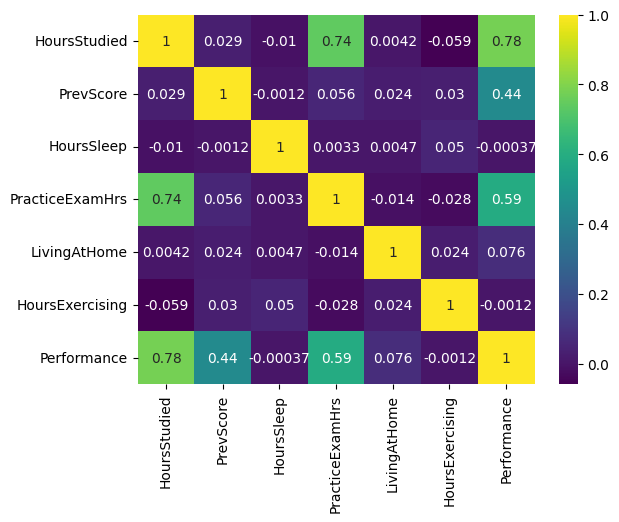

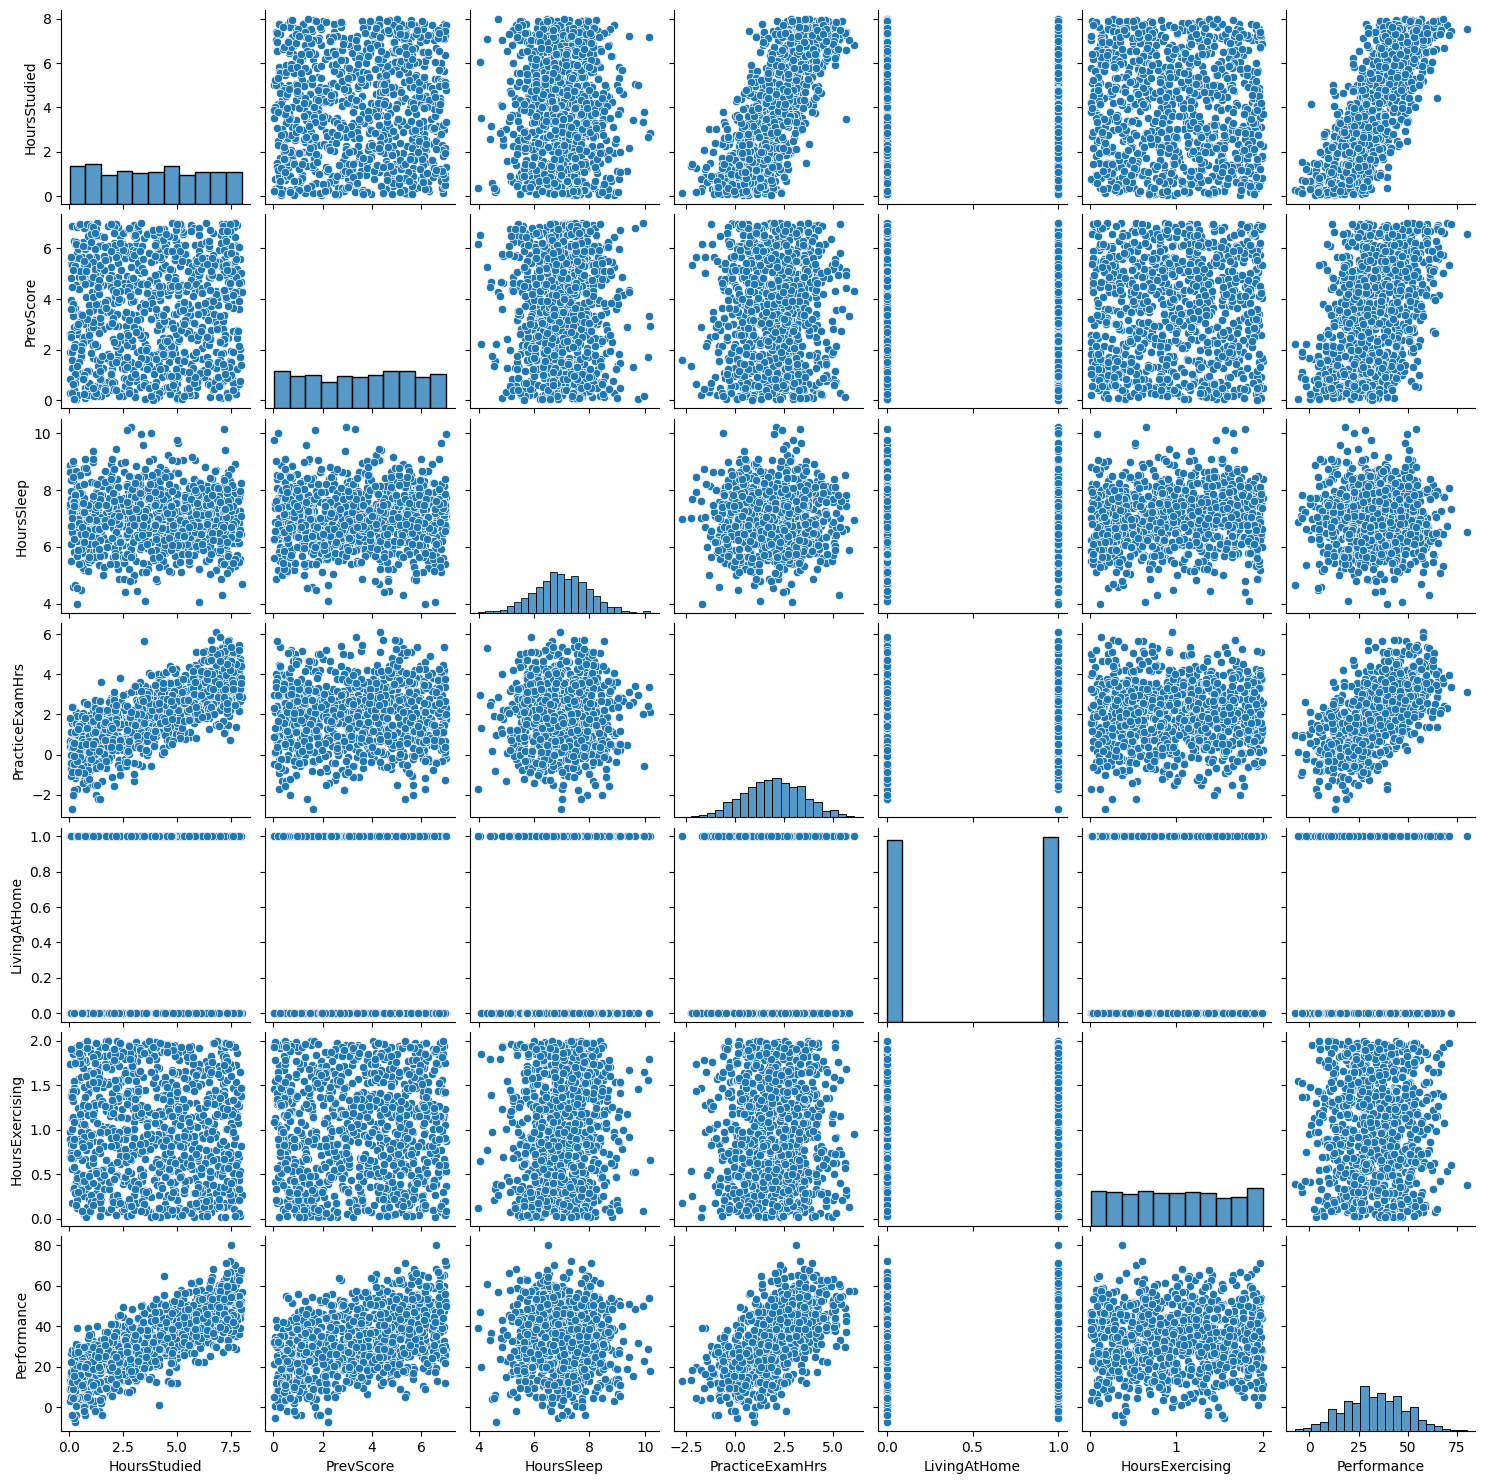

In [3]:
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

corr_matrix = challenge_df.corr()
sns.heatmap(corr_matrix,annot=True, cmap="viridis")

pairplot = sns.pairplot(challenge_df)
pairplot.figure.set_size_inches(15, 15)

From the visualisations above we can make several observations:
1. The 'HourseStudied', 'PrevScore' and 'PracticeExamHrs' features have high correlation with our 'Performance' target variable, so we will certainly use these features to predict 'Performance'. 'LivingAtHome' has a slight positive correlation so we will keep it and see what contribution it has. Overall, we will drop 'HoursSleep' and 'HoursExercising' from our features and keep the rest.
2. There does not seem to be any non-linear relationships with our target variable. This works in our favour because we are using linear regression!
3. 'PracticeExamHrs', 'HoursSleep' and 'Performance' all have normal distributions, whilst the other features have uniform distributions. This does make it more challenging for the model to find an optimum solution as regression works best on normally distributed data. 
4. 'LivingAtHome' is a boolean value (either 0 or 1). One-hot Encoding is a useful way to implement categorial data with more than 2 categories into a regression problem. Luckily 'LivingAtHome' only has 2 categories, either still at home (1) or not at home (0). This column can be left in, but it is important to remember that the regression coefficient calculate for 'LivingAtHome' will just be a constant added to the result when 'LivingAtHome' is 1, and won't be added when the feature is 0. 
5. There is a high correlation between 'PracticeExamHrs' and 'HoursStudied'. This means that the dataset contains multicollinearity.Multicollinearity impacts the coefficient estimates but it does not impact goodness of fit. This means if your main goal is to make predictions then we can ignore the multicollinearity. However if the goal is to understand the exact relationship between the features and target variable then we do need to be concerned about mutlicollinearity. For the professor, he cares about what features impact 'Performance' and how these features affect it. Therefore, we need to do something about the multicollinearity. There are several things we can do:
- Remove one of the features that have the least impact on the 'Performance'
- Combine 'HoursStudied' and 'PracticeExamHrs' into a single variable
- Use a regression model that handles multicollinearity, like Ridge or Lasso Regression


We will pick the quickest solution and drop the 'PracticeExamHrs' feature because it has a lower correlation with 'Performance' than 'HoursStudied' does.


### Split Data
Based on our analysis above, we can split the dataset into 'HoursStudied', 'PrevScore' and 'LivingAtHome' as our features and 'Performance' as our target variable. We can split into training and test data and shuffle the split to ensure there is no bias.

In [4]:
from sklearn.model_selection import train_test_split

x = challenge_df[['HoursStudied', 'PrevScore','LivingAtHome']]
y = challenge_df["Performance"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, shuffle=True)

### Model Training
We can now train the model on the training dataset and then create a summary of the model to see how it is performing.


In [5]:
# Model Training we are using the statsmodel library because it gives us the ability to retrieve a summary of the model using model_fit.summary() 
model = sm.OLS(y_train, x_train)
model_fit = model.fit()

# Predictions and Evaluation
y_pred = model_fit.predict(x_test)

# There are a lot of numbers shown in this summary, we will cover them in detail below
print(model_fit.summary())


                                 OLS Regression Results                                
Dep. Variable:            Performance   R-squared (uncentered):                   0.965
Model:                            OLS   Adj. R-squared (uncentered):              0.965
Method:                 Least Squares   F-statistic:                              7357.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):                        0.00
Time:                        07:29:11   Log-Likelihood:                         -2670.0
No. Observations:                 800   AIC:                                      5346.
Df Residuals:                     797   BIC:                                      5360.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [6]:
x_with_constant = sm.add_constant(x_train)
het_result = sms.het_breuschpagan(model_fit.resid,x_with_constant)
print(f"\n'Lagrange multiplier statistic': {het_result[0]}")
print(f"'p-value': {het_result[1]}")




'Lagrange multiplier statistic': 0.17292181935628648
'p-value': 0.9818375097211678


In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# Later versions of sklearn have root_mean_squared_error, for simplicity we will use mean_squared_error and use np.sqrt on this to get the same number

rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"RMSE: {rmse}")


RMSE: 7.565355664376324


Model Output Analysis:
1. Adj. R-squared: Relatively close to 1, model has an overall good fit
2. Prob (F-statistic): Very low probability indicates that our model explains a large amount of the variation in the dependent variable
3. P>|t|: All the probabilities are P<0.05, so we can say that all three features have an impact on the model
4. Omnibus and Jarque-Bera: Both are P>0.05 which indicates the residuals are normally distributed. This means our model has found a good fit.
5. Durbin-Watson: The low value of ~2 (similar to Omnibus of ~1.3 and Jarque-Bera ~1.1) indicates that the null hypothesis has been accepted. Meaning we can say the errors are white noise with no autocorrelation.
6. Breusch-Pagan Test: High p-value means we accept the hypothesis, and can say the data is monoscedastic (constant variance across the residuals)
7. RMSE - Considering our 'Performance' ranges from 0 to 75, an RMSE of 7.5 shows a relatively good fit with some error.


### Visualisations
The residual plot shows no relationship so we can conclude the model has no heteroscedasticity and the chosen features are appropriate to predict 'Performance'.

Scatter actual values against predictions shows a mostly relative fit but still with some noise. This either means we have an exterior feature to add to the mode, or the 'Performance' value has a large amount of white noise.

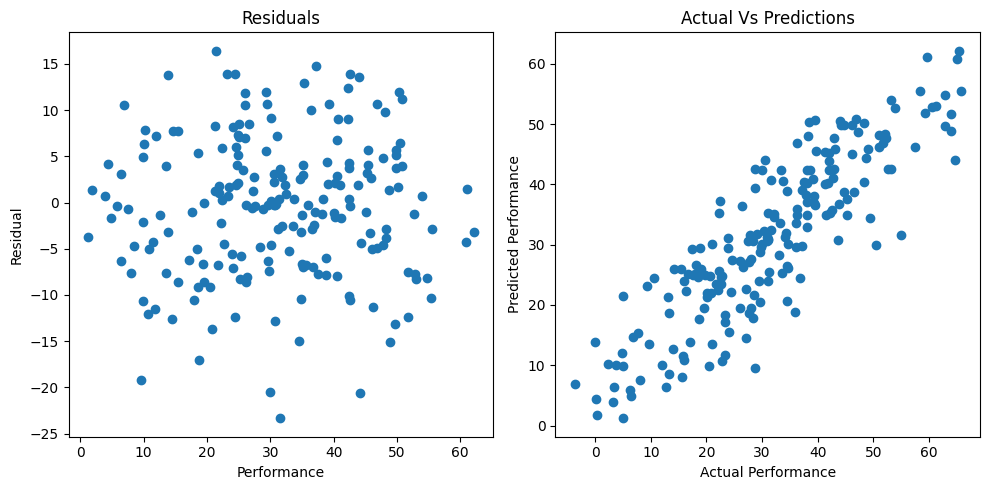

In [8]:
# Make sure to use the residuals of the test set, not the training set
resid = y_pred.values-y_test.values

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_pred,resid)
plt.xlabel("Performance")
plt.ylabel("Residual")
plt.title("Residuals")
plt.subplot(1,2,2)
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Performance")
plt.ylabel("Predicted Performance")
plt.title("Actual Vs Predictions")
plt.tight_layout()
plt.show()

Both of the plots below show normality in the residuals, so the model has done the best it can to learn the relationships in the dataset, and the chosen features are good at explaining the overall variance in 'Performance'.

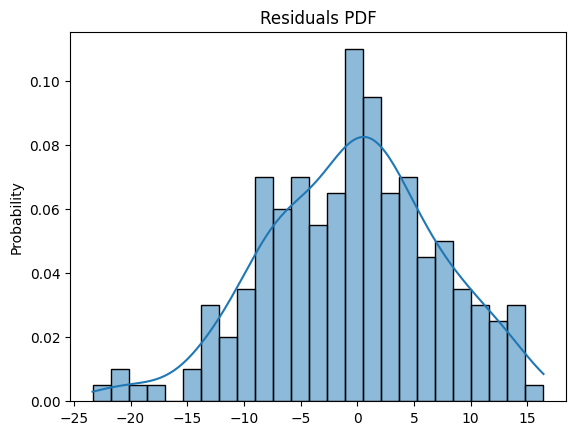

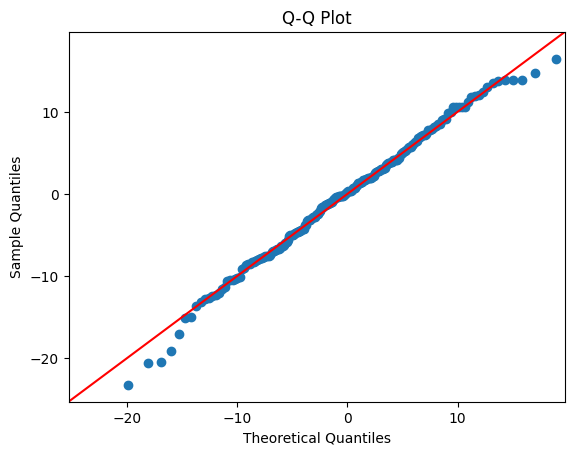

In [9]:
mean = np.mean(resid)
std_dev = np.std(resid)
norm_data = np.random.normal(mean,std_dev,10000)

# Probability Density Function
sns.histplot(resid,bins=25,stat="probability",kde=True)
plt.title("Residuals PDF")
plt.show()

# QQ Plot
sm.qqplot(resid, loc=mean, scale=std_dev, line='45')
plt.title("Q-Q Plot")
plt.show()

### Improvements

The model has performed relatively well, but we can still see some noise when we scatter actuals against predictions. Because the residuals show no patterns in the residual scatter plot, it is appropriate to conclude that the model has performed the best it can with the features we have given it. 

There are several things we can explore to improve performance:
1. Combine the features with collinearity into a single feature and test performance
2. Implement Lasso or Ridge regression to optimise coefficients for collinear features. Remember though, this makes it more challenging to justify the importance of each feature individually to 'Performance'
3. Explore other features not listed and see if they hold any relationship with 'Performance'. If the relationship is non-linear, then polynomial regression may become our best friend!
4. Maybe our dataset needs to be cleaned? Are there any outliers or weird anomalies that the model is having to fit to.

Can you think of any more?

# **Challenge Question 2**
Using the Titanic dataset from Seaborn, build a classification model to predict whether a passenger survived or not. Your task includes:

1. Preprocessing the data (handling missing values and encoding categorical variables).
2. Train a classification model.
3. Evaluating the model's performance using precision/recall, a confusion matrix and any other appropriate metrics.
4. Visualizing feature importance to understand which features influenced survival predictions the most.

## Extra Challenge
To really challenge yourself use the XGBoost Classification model.

A basic example of how to use XGBClassifier is available [here](https://www.geeksforgeeks.org/machine-learning/xgbclassifier/)

You might also need to transform categorical features into numerical values using encoding. To learn about encoding go [here](https://dnmtechs.com/xgboost-categorical-variables-dummification-vs-encoding-in-python-3-programming/). This website also has the benefit of explainig what one hot encoding is.

We are going to use the XGBoost model. A powerful and efficient tool for classification. XGboost is one of the rare models that can do both regression and classification tasks!

In [ ]:
! pip install xgboost

In [78]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_recall_curve, roc_curve, auc
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [88]:
challenge_2_df = sns.load_dataset('titanic').drop(['who','alive','sex'],axis='columns') # Removing features with high multi-collinearity

In [89]:
challenge_2_df

,survived,pclass,age,sibsp,parch,fare,embarked,class,adult_male,deck,embark_town,alone
0,0,3,22.0,1,0,7.2500,S,Third,True,NaN,Southampton,False
1,1,1,38.0,1,0,71.2833,C,First,False,C,Cherbourg,False
2,1,3,26.0,0,0,7.9250,S,Third,False,NaN,Southampton,True
3,1,1,35.0,1,0,53.1000,S,First,False,C,Southampton,False
4,0,3,35.0,0,0,8.0500,S,Third,True,NaN,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,Second,True,NaN,Southampton,True
887,1,1,19.0,0,0,30.0000,S,First,False,B,Southampton,True
888,0,3,NaN,1,2,23.4500,S,Third,False,NaN,Southampton,False
889,1,1,26.0,0,0,30.0000,C,First,True,C,Cherbourg,True


We are going to use encoding to transform the categorical labels into numerical values. For example ['cat', 'dog','lizard'] will be converted to [0 , 1, 2]

In [90]:

for col in ['adult_male','embarked','embark_town', 'class', 'deck']:
    le = LabelEncoder()
    challenge_2_df[col] = le.fit_transform(challenge_2_df[col]).astype(int)


Split our dataset into features and output

In [91]:
X = challenge_2_df.drop('survived',axis='columns')
Y = challenge_2_df[['survived']]

Split our data into train and test.

In [92]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, random_state = 42)

Because this is a binary classification task we have chosen the binary:logistic objective. Because this is a relatively simple task we have set the max_depth to 3. Any deeper and we might start overfitting. We have also set the learning rate and number of estimators. There are a wide range of parameters you can choose from and set for the XGBoost model. 

In [93]:
model = xgb.XGBClassifier(
    objective=  'binary:logistic',
    max_depth= 3,
    learning_rate= 0.1,
    n_estimators= 100,
    random_state= 42
)

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

## **Feature Importance in XGBoost**
XGBoost provides several ways to evaluate feature importance based on how features contribute to the construction of decision trees. The three main types are:
### 1. **Weight-Based Importance** 
Measures the number of times a feature is used to split the data across all trees. A higher count means the feature is frequently used in decision-making.

It is simple and fast to compute and useful for a quick overview. However, it doesn’t consider the quality of the split. It can be misleading if a feature is used often but contributes little to model performance.

### 2. **Gain-Based Importance**
Measures the average gain (i.e., improvement in accuracy or reduction in loss) brought by a feature when it is used in splits. Higher gain means the feature contributes more to reducing error.

Most informative and reliable for understanding feature impact and it is directly tied to model performance. However, it can be biased toward features used in deeper splits. Also, it may overemphasize features used in fewer but high-gain splits.

### 3. **Cover-Based Importance**
Measures the average coverage (i.e., number of samples affected) by splits using a feature. Higher cover means the feature is used in splits that affect more data points.

It highlights features that influence large portions of the data. It is useful for understanding data distribution impact. However, it doesn’t reflect the quality of the split. It can be misleading if a feature affects many samples but doesn’t improve accuracy.

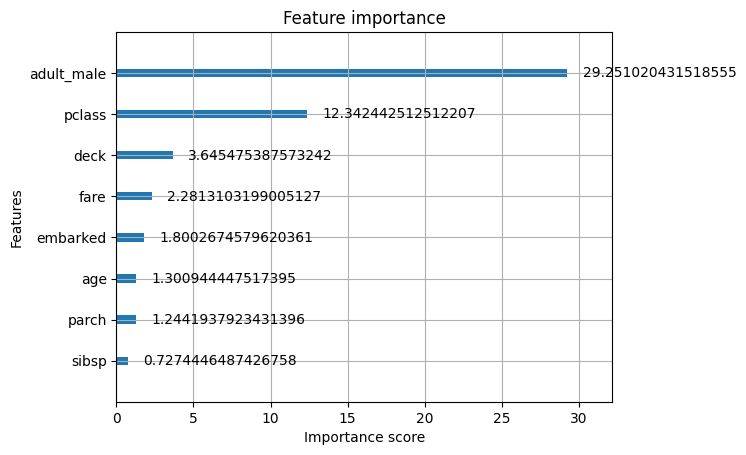

In [94]:
xgb.plot_importance(model,importance_type='gain')
plt.show()

We can see from the feature importance visual above that the 'adult_male' feature has the greatest gain. This means that this feature contributes the most to increasing the performance of predictions. 

The precision and recall scores are all relatively similar. The main drop is the recall of the 1 class (survived). As the recall is how many of the actual positive samples were correctly labelled as positive, we can summise that there were a few people who survived, who were instead labelled as perished. This could be caused because there is less support for the survived class than the perished class.  

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       134
           1       0.80      0.74      0.77        89

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.82      0.83      0.82       223



The confusion matrix shows a similar thing. For the most part the model performs well to predict the two classes. However, there are quite a few cases where a person was predicted to have perished, when they actually survived (bottom left).

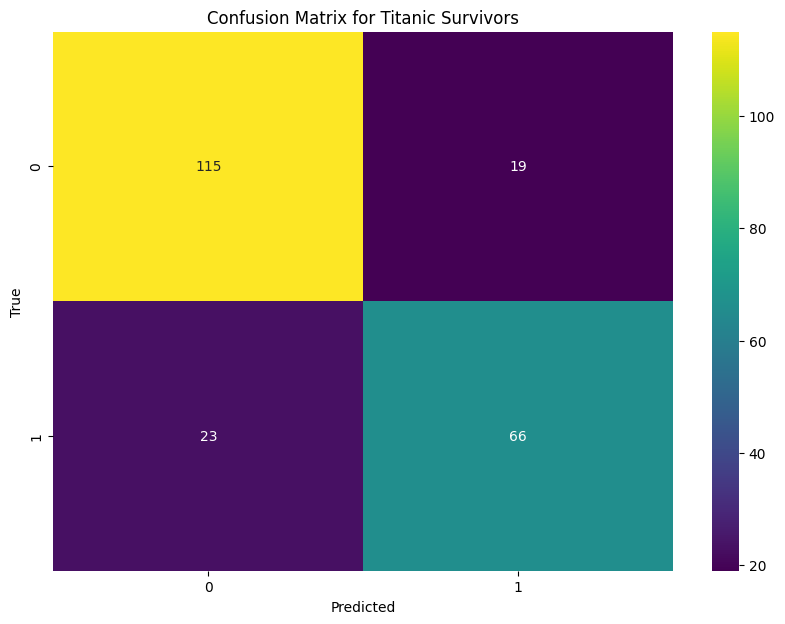

In [97]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Titanic Survivors')
plt.show()

The ROC and Precision-Recall curve can mainly be analysed for their visual appearance. They both are relatively close to right angles so we can say the model has performed well. The area under the curve of the ROC is also relatively high. 

ROC Area Under Curve: 0.8842025825926546


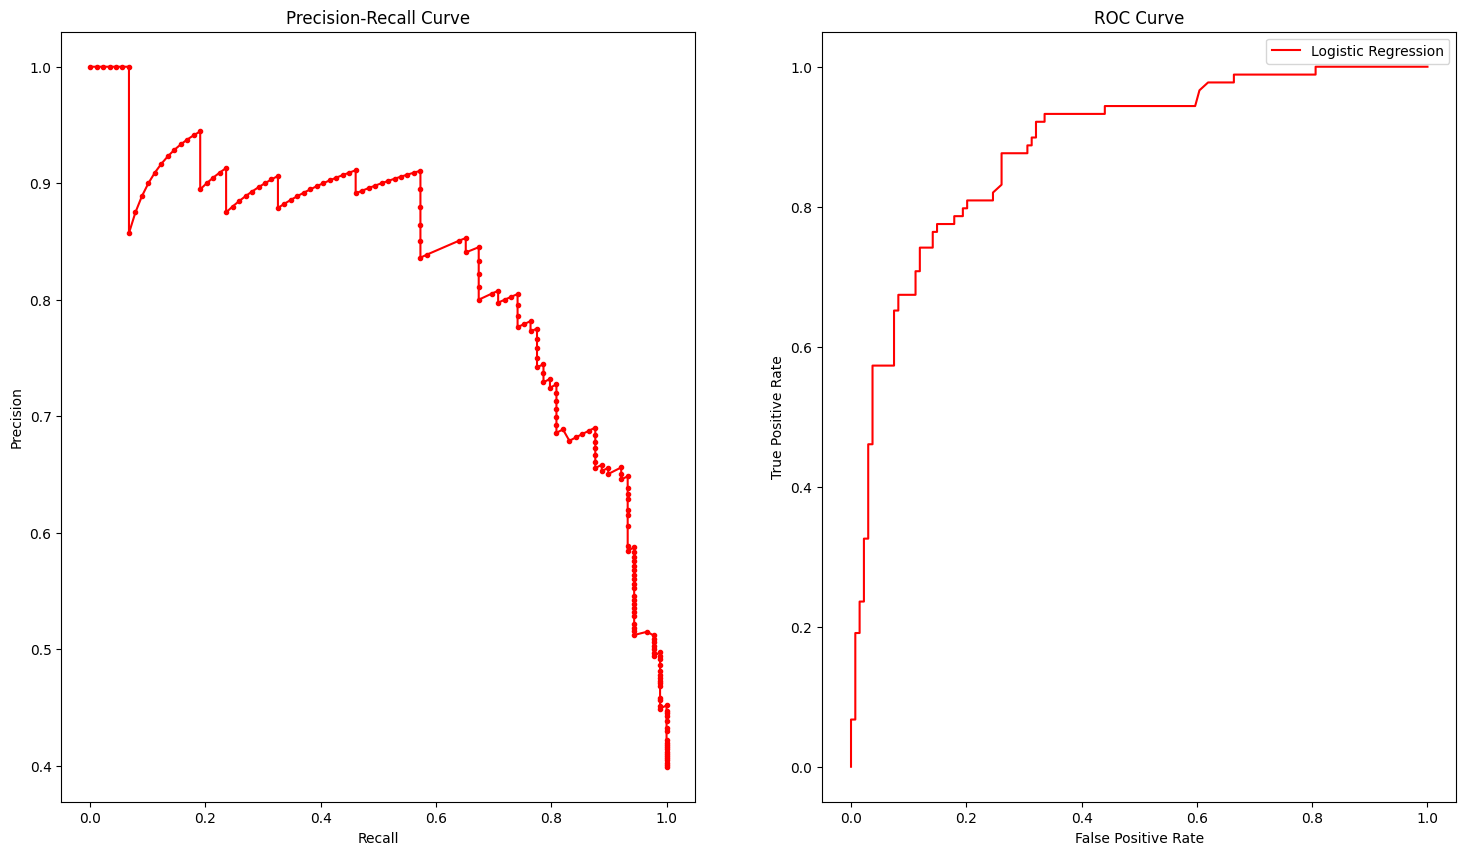

In [98]:
y_probs = model.predict_proba(x_test)[:,1]
# Computing precision-recall pairs
precision, recall, _ = precision_recall_curve(y_test, y_probs)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_probs)
roc_auc = auc(false_positive_rate,true_positive_rate)

print(f"ROC Area Under Curve: {roc_auc}")

plt.figure(figsize=(18,10))

plt.subplot(1,2,1)
plt.plot(recall, precision, marker='.', color='red', label="Logistic Regression")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

plt.subplot(1,2,2)
plt.plot(false_positive_rate, true_positive_rate,label="Logistic Regression", color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")

plt.legend()
plt.show()

## Concluding Remarks
We can safely say overall the model has performed well. The main draw back is the few cases where survivors were predicted as perished. There are a few things we can do from here to improve performance.
- See if there are any other features to add to increase performance
- Change the parameters of the XGBClassifer model
- Use a different model
- Transform the data
- Add more data and evenly distribute between the two classes.

Can you think of any more?

# **Challenge Question 3: Extend Yourself**

This is another hard challenge question that utilises the dataset from last week. If you have the time, this is an opportunity to really extend yourself and learn some new things!

Your challenge, if you so choose to accept it, is to create a time series forecast of charging volume. You can use any time series model you like. One that we recommend is ARIMA, which you can learn about [here](https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/).

To achieve this you must do the following:
1. Choose just ONE site to forecast.
2. If need be, transformer and filter the data
3. Choose how you want to split the data into train and test. For example you might want to split it into 3 months of training and 3 months of testing. You could even test to see how many months of training data is requried to get accurate results.
3. Select a forecasting model and train it (e.g. ARIMA, SARIMAX, Prophet, etc).
4. Predict charging volume for the next 3 months. You will need to split the data to allow for 3 months of testing data.
5. Create visuals to analyse the performance of the model.

## Tips
- Start simple and build complexity gradually.
- Use libraries like pandas, statsmodels, matplotlib, and scikit-learn.
- Document your process and findings clearly.
- If you're stuck, revisit the ARIMA tutorial or explore other models like Facebook Prophet.

In [99]:
df = challenge_3_df.copy()
df

,date,site_id,volume,duration,charging_fee,feelslike,dew,precip,windgust,windspeed,pressure,visibility,cloudcover,solarradiation
0,2023-04-01,0,115.500000,17.500000,0.0,14.825000,6.816667,0.000000,15.383333,3.908333,1019.875000,16.0,1.262500,177.833333
1,2023-04-01,1,92.400000,14.000000,0.0,14.825000,6.816667,0.000000,15.383333,3.908333,1019.875000,16.0,1.262500,177.833333
2,2023-04-01,2,240.350000,36.416667,0.0,14.825000,6.816667,0.000000,15.383333,3.908333,1019.875000,16.0,1.262500,177.833333
3,2023-04-01,3,255.200000,38.666667,0.0,14.825000,6.816667,0.000000,15.383333,3.908333,1019.875000,16.0,1.262500,177.833333
4,2023-04-01,4,130.154839,19.720430,0.0,14.825000,6.816667,0.000000,15.383333,3.908333,1019.875000,16.0,1.262500,177.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40987,2023-09-30,224,29.650746,4.492537,0.0,18.908333,14.120833,0.008125,20.437500,5.220833,1010.554167,16.0,88.791667,36.416667
40988,2023-09-30,225,13.200000,2.000000,0.0,18.908333,14.120833,0.008125,20.437500,5.220833,1010.554167,16.0,88.791667,36.416667
40989,2023-09-30,226,24.000000,2.000000,0.0,18.908333,14.120833,0.008125,20.437500,5.220833,1010.554167,16.0,88.791667,36.416667
40990,2023-09-30,227,77.218018,11.699700,0.3,18.908333,14.120833,0.008125,20.437500,5.220833,1010.554167,16.0,88.791667,36.416667


In [ ]:
!pip install statsforecast

In [100]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
import seaborn as sns
import datetime
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
import matplotlib.pyplot as plt


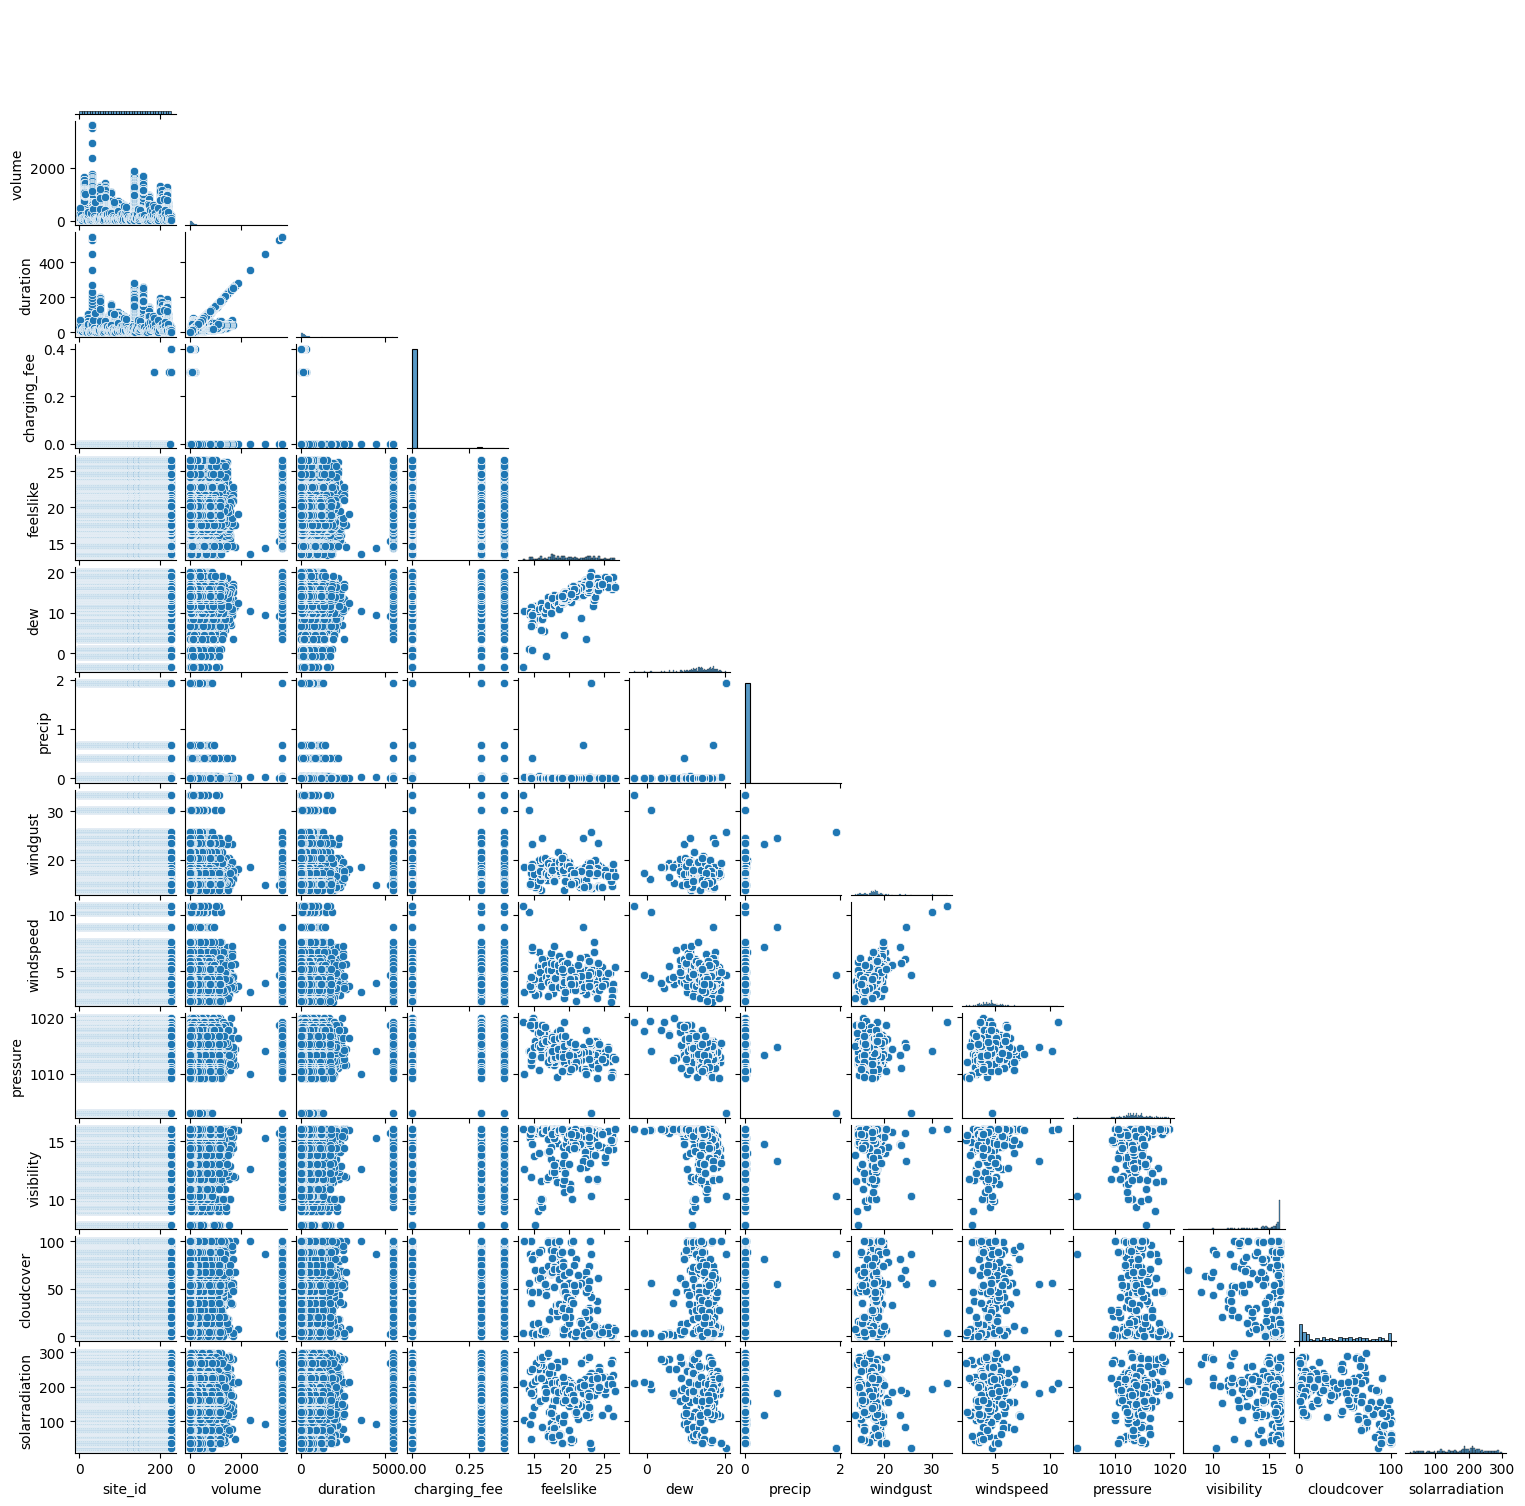

In [101]:
pairplot = sns.pairplot(df, corner=True)
pairplot.figure.set_size_inches(15, 15)

From the pairplot we can see there are a few features we can remove:
1. site_id: This can usually be removed. But for the statsforecast ARIMA model an 'id' field is requried. So in this instance we will keep it.
2. charging_fee: The charging fee does not have many values, so it will not give us any information
3. precip: The precip remains mostly at 0, so we can also remove it.

The code will take a while to run. This is because we are essentially training a model for each site, and each of these models is finding the optimum ARIMA parameters (using AutoARIMA). There are roughly around 4000 different configurations for the parameters, and around 224 sites, this equals around 896000 different models to train!

If you tried to do this manually it would take a very long time. The statsforecast package is highly optimised and makes this process a lot quicker. Still, it will take a few minutes to go through all the sites.

In [5]:
cleaned_df = df.drop(['charging_fee','precip'], axis='columns')
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
cleaned_df['site_id'] = cleaned_df['site_id'].astype(str) #the statsforecast model requires it as a string
cleaned_df = cleaned_df.rename(columns={"volume":'y',"date":'ds',"site_id":'unique_id'}) #renaming the columns for the statsforecast default parameters to make our lives easier

cleaned_df = cleaned_df.reindex(columns=['unique_id', 'ds', 'y', 'duration','feelslike', 'dew', 'windgust', 'windspeed',
       'pressure', 'visibility', 'cloudcover', 'solarradiation'])

cut_off_date = datetime.datetime(2023,8,1)

train_df = cleaned_df[cleaned_df['ds']<=cut_off_date]
test_df = cleaned_df[cleaned_df['ds']>cut_off_date]

x_test = test_df.drop('y', axis='columns')
y_test = test_df[['unique_id', 'ds', 'y']]

models = [AutoARIMA(season_length=7)] # We are looking at daily data so season_length = 7

sf = StatsForecast(
       models = models,
       freq = 'D',
       n_jobs = 1
)

# level = 95 means that the range of values should include the actual future value with probability 95%
fcast = sf.forecast(df=train_df, h=60,X_df=x_test, level=[95])

C:\Users\gb191\AppData\Roaming\Python\Python312\site-packages\statsforecast\arima.py:1160: UserWarning: xreg not required by this model, ignoring the provided regressors
  warnings.warn(
C:\Users\gb191\AppData\Roaming\Python\Python312\site-packages\statsforecast\arima.py:1160: UserWarning: xreg not required by this model, ignoring the provided regressors
  warnings.warn(
C:\Users\gb191\AppData\Roaming\Python\Python312\site-packages\statsforecast\arima.py:1160: UserWarning: xreg not required by this model, ignoring the provided regressors
  warnings.warn(
C:\Users\gb191\AppData\Roaming\Python\Python312\site-packages\statsforecast\arima.py:1160: UserWarning: xreg not required by this model, ignoring the provided regressors
  warnings.warn(
C:\Users\gb191\AppData\Roaming\Python\Python312\site-packages\statsforecast\arima.py:1160: UserWarning: xreg not required by this model, ignoring the provided regressors
  warnings.warn(


We have now created a 3 month forecast for every site. This comes with a high and low forecast.

In [6]:
fcast

,unique_id,ds,AutoARIMA,AutoARIMA-lo-95,AutoARIMA-hi-95
0,0,2023-08-02,152.972224,152.142895,153.801554
1,0,2023-08-03,121.582407,120.753077,122.411736
2,0,2023-08-04,148.632773,147.803443,149.462102
3,0,2023-08-05,133.149364,132.320034,133.978693
4,0,2023-08-06,62.142126,61.312796,62.971456
...,...,...,...,...,...
13435,99,2023-09-26,193.297333,192.447816,194.146849
13436,99,2023-09-27,176.842374,175.992857,177.691890
13437,99,2023-09-28,160.345884,159.496367,161.195400
13438,99,2023-09-29,143.860417,143.010901,144.709934


We can now calculate some regression metrics on the forecasts. 

In [7]:
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Rename columns for clarity
fcast = fcast.rename(
    columns={
        'AutoARIMA':'y_pred', 
        'AutoARIMA-lo-95':'y_pred_low',
        'AutoARIMA-hi-95':'y_pred_high'
        }
)

# Merge the forecasts with the actual values
results = y_test.merge(fcast, how='left', on=['unique_id','ds'])

# Calculate the residuals
results['residual'] = results['y'] - results['y_pred']

# Create a function to calculate RMSE, MAE and R2 for each site
def calc_site_results(site):
    site['rmse'] = root_mean_squared_error(site['y'],site['y_pred'])
    site['mae'] = mean_absolute_error(site['y'],site['y_pred'])
    site['r2'] = r2_score(site['y'],site['y_pred'])
    return site

# Calculate RMSE, MAE and R2 for each site
site_results = (results.groupby('unique_id')
                        .apply(calc_site_results)
                        .reset_index(drop=True)
                        .groupby('unique_id')
                        .agg({"rmse":'mean','mae':'mean','r2':'mean'})
                        .reset_index())

C:\Users\gb191\AppData\Local\Temp\ipykernel_32916\2905524860.py:14: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calc_site_results)


A lot of the sites score extremely well. Which is a good thing! We are going to choose one of these sites and look at the results in more detail. We will choose a site that has slightly lower scores, otherwise the graphs will be boring.

In [102]:
site_results_best.sort_values(by='r2', ascending=False)

,unique_id,rmse,mae,r2
1,1,0.000000e+00,0.000000e+00,1.000000
3,100,6.012455e-13,6.005122e-13,1.000000
4,101,3.974702e-14,3.043491e-14,1.000000
11,108,3.309250e-13,3.264944e-13,1.000000
12,109,2.129144e-14,1.626847e-14,1.000000
...,...,...,...,...
41,136,3.245366e+01,2.371803e+01,0.946264
185,64,6.315425e+01,5.354237e+01,0.945050
203,80,3.085864e+00,2.317186e+00,0.931331
26,121,1.066068e+01,8.404394e+00,0.915731


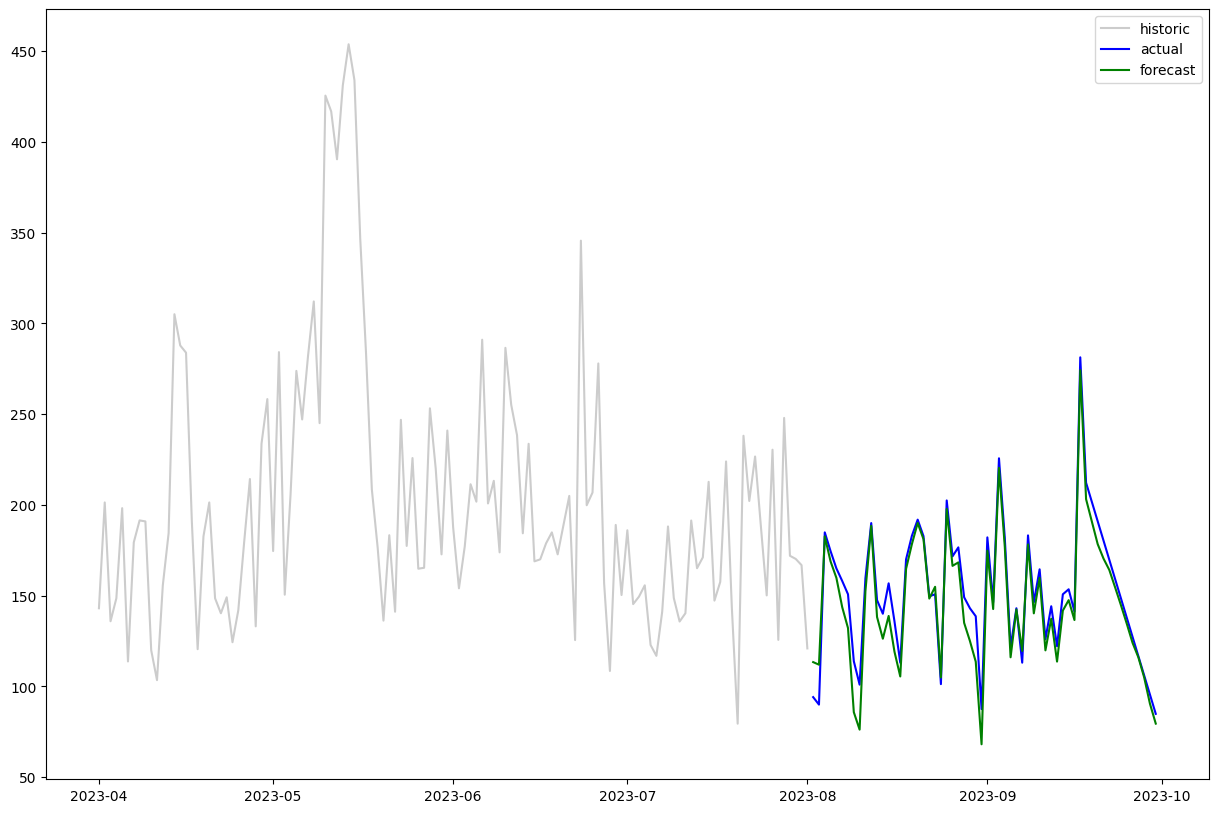

In [111]:
site_id = '121'

plt.figure(figsize=(15,10))
plt.plot(train_df[train_df['unique_id']==site_id]['ds'], train_df[train_df['unique_id']==site_id]['y'], label = 'historic', color = '0.8')
plt.plot(results[results['unique_id']==site_id]['ds'],results[results['unique_id']==site_id]['y'], label = 'actual', color = 'b')
plt.plot(results[results['unique_id']==site_id]['ds'],results[results['unique_id']==site_id]['y_pred'], label = 'forecast', color = 'g')
plt.legend()
plt.show()

We can see the prediction has a relatively close fit to the actuals. We can also see that the high and low predictions have a tight fit around the centre prediction. This means the forecast is highly confident with its results.

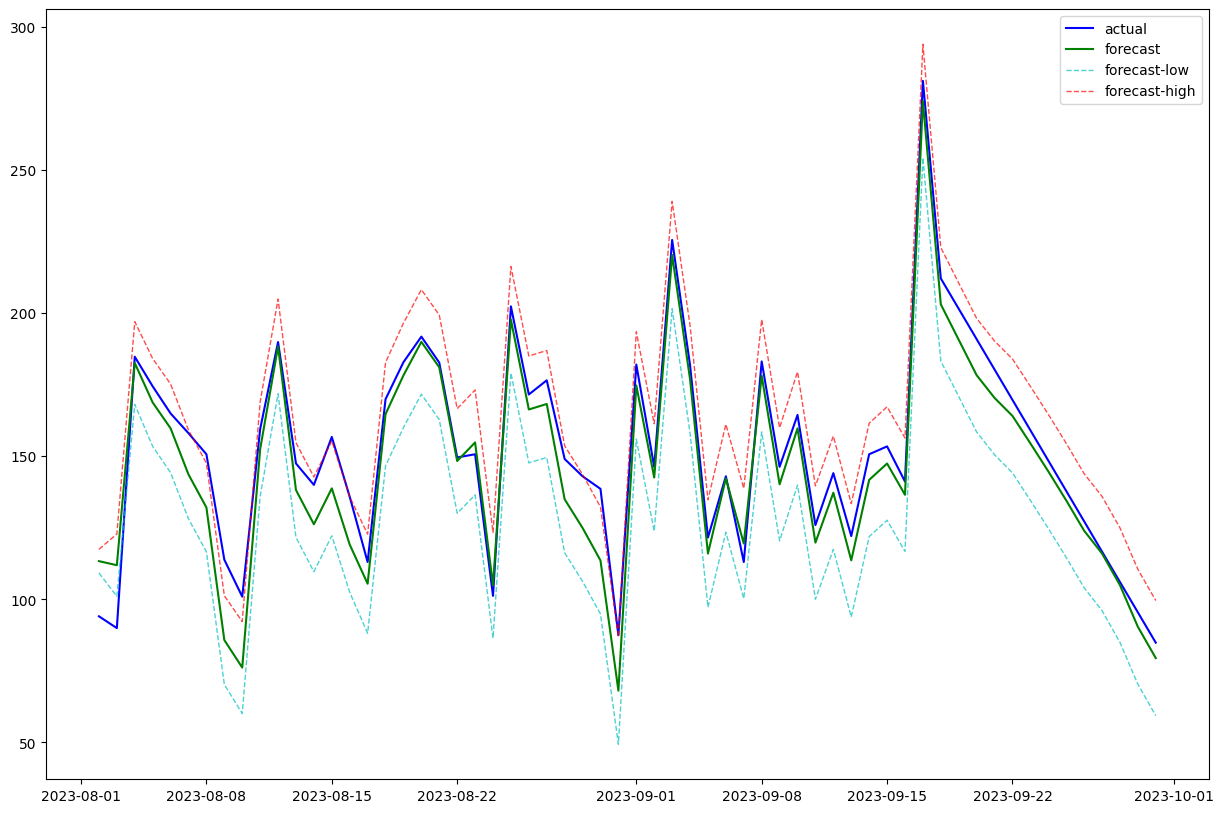

In [113]:
plt.figure(figsize=(15,10))
plt.plot(results[results['unique_id']==site_id]['ds'],results[results['unique_id']==site_id]['y'], label = 'actual', color = 'b')
plt.plot(results[results['unique_id']==site_id]['ds'],results[results['unique_id']==site_id]['y_pred'], label = 'forecast', color = 'g')
plt.plot(results[results['unique_id']==site_id]['ds'],results[results['unique_id']==site_id]['y_pred_low'], label = 'forecast-low', linestyle = 'dashed', linewidth = 1, alpha = 0.7, color = 'c')
plt.plot(results[results['unique_id']==site_id]['ds'],results[results['unique_id']==site_id]['y_pred_high'], label = 'forecast-high', linestyle = 'dashed', linewidth = 1, alpha = 0.7, color = 'r')
plt.legend()
plt.show()

The model looks to be performaning relatively well based on the graphs below. 
- The residuals are normally distributed (green tick)
- The plot of actuals vs predicted is close to a linear line (green tick)
- The CDF of the residuals follows the CDF of a normal distribution (green tick)
- However, there seems to be a bit of a pattern in the residuals across time (red cross). This means there might still be some pattern in the data that has not been captured in the features.

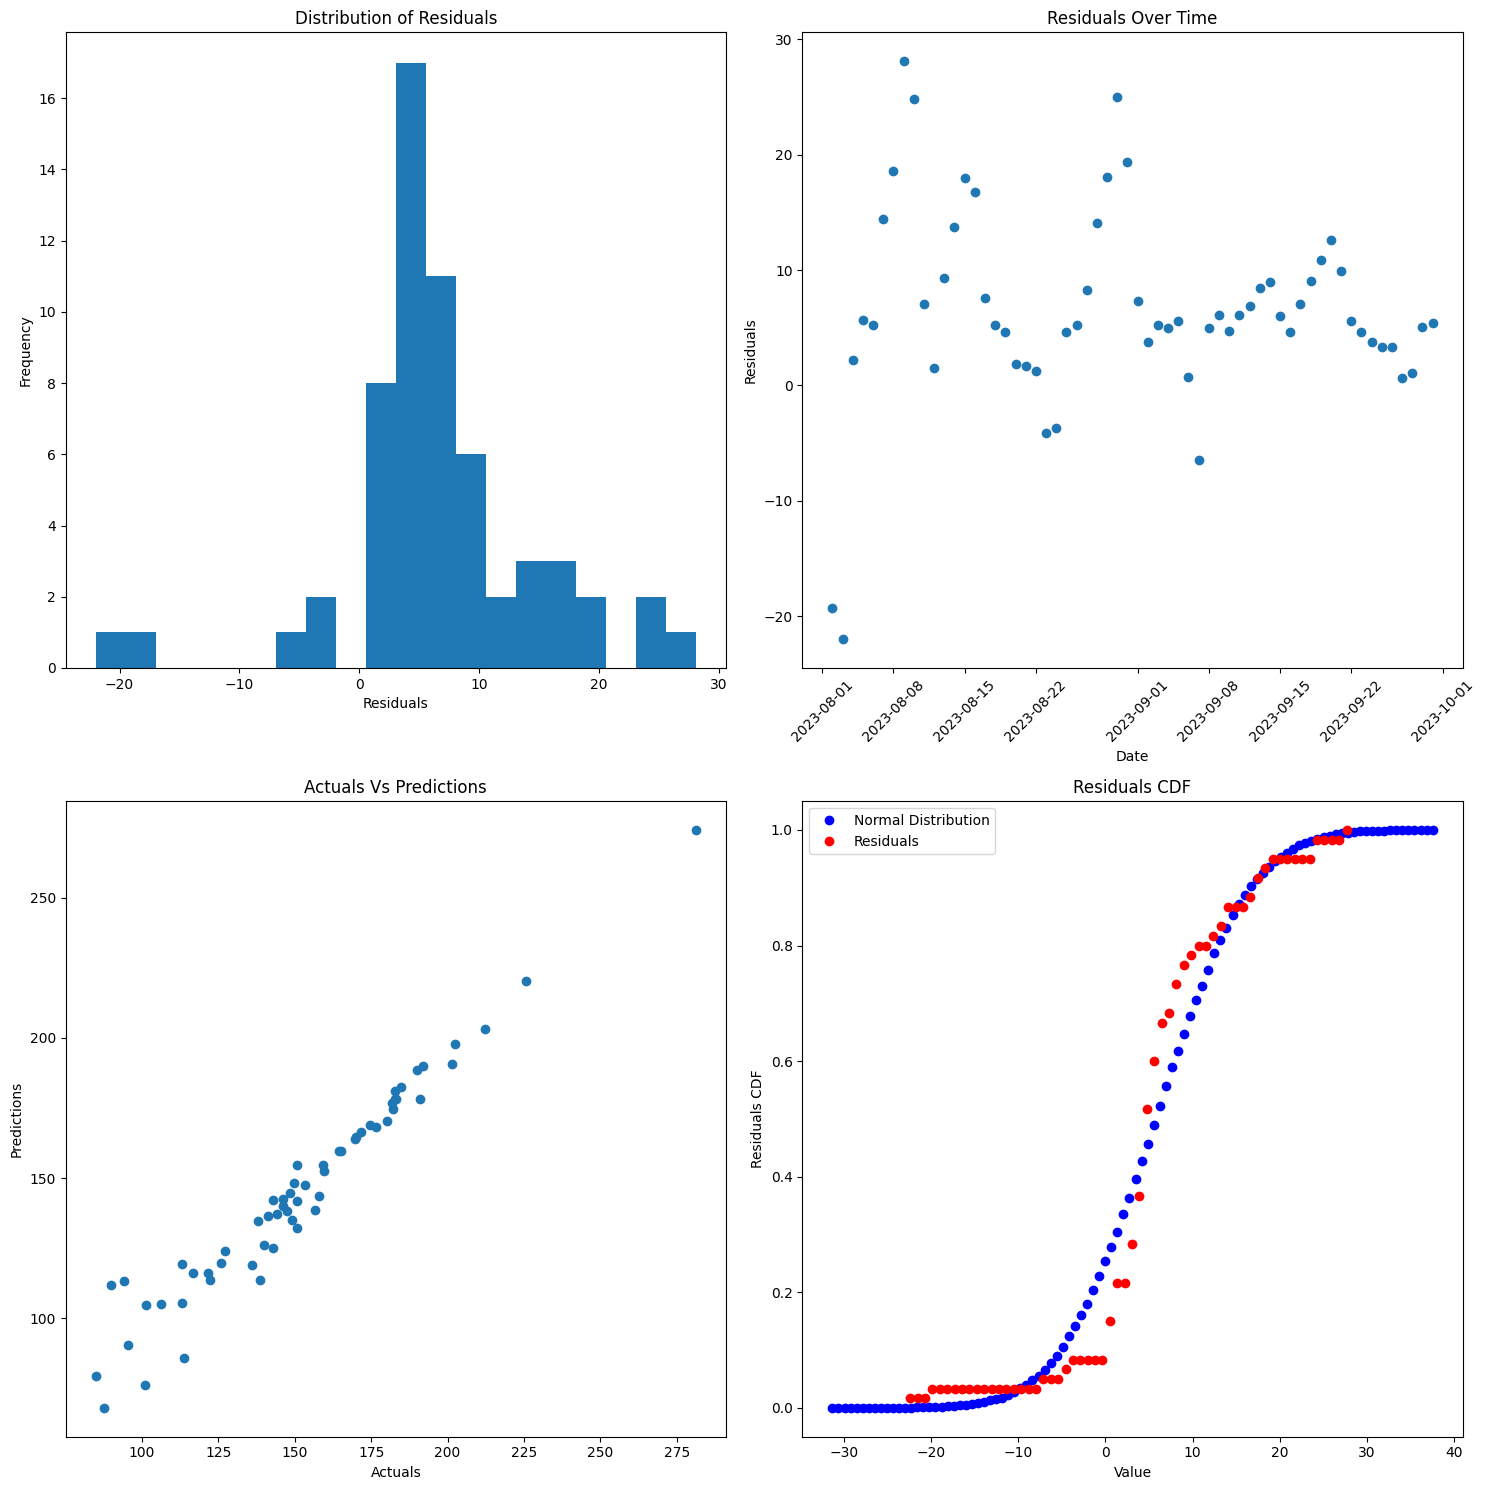

In [116]:
# CDF Plot
import scipy
resid = results[results['unique_id']==site_id]['residual']
mean = np.mean(resid)
std_dev = np.std(resid)
norm_data = np.random.normal(mean,std_dev,10000)

n_test_samples = len(resid)
counts, start, dx, _ = scipy.stats.cumfreq(resid, numbins=n_test_samples)
x = np.arange(counts.size) * dx + start

counts_, start_, dx_, _ = scipy.stats.cumfreq(norm_data, numbins=100)
x_norm = np.arange(counts_.size) * dx_ + start_

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.hist(results[results['unique_id']==site_id]['residual'], bins=20)
plt.title("Distribution of Residuals")
plt.xlabel('Residuals')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.scatter(results[results['unique_id']==site_id]['ds'],results[results['unique_id']==site_id]['residual'])
plt.xticks(rotation= 45)
plt.title("Residuals Over Time")
plt.xlabel("Date")
plt.ylabel("Residuals")

plt.subplot(2,2,3)
plt.scatter(results[results['unique_id']==site_id]['y'],results[results['unique_id']==site_id]['y_pred'])
plt.title("Actuals Vs Predictions")
plt.xlabel("Actuals")
plt.ylabel("Predictions")

plt.subplot(2,2,4)
plt.plot(x_norm, counts_/10000, 'bo', label ="Normal Distribution")
plt.plot(x, counts/n_test_samples, 'ro', label="Residuals")
plt.xlabel('Value')
plt.ylabel('Residuals CDF')
plt.title('Residuals CDF')

plt.legend()

plt.tight_layout()
plt.show()

## **Final Thoughts**

Now the question is, did we really need to go through all that effort to use a fancy AutoARIMA model?

For this example the answer is (drum roll please)... no.

The reason being is the 'duration' feature is highly correlated to the volume. So we can train a simple regression model to get same and if not better results. It saves us an enormous amount of effort, and is so much more efficient. 

So this teaches us a vital lesson...

`Make sure to look at your data! `

Machine Learning is like a swiss army knife. There are so many bits and bobs it can be confusing to know what to choose. You aren't going to try and whittle wood with the pull out toothpick, or open a can with that useless saw blade. You should instead carefully think about a few very important factors before selecting a model.

1. What is the objective of my task? Am I creating forecasts? Am I splitting data into categories? Am I predicting a range of values?
2. How large is my dataset? Do I have lots of features or just one?
3. What patterns can I see in the dataset? Can I even see any patterns?
4. How computationally efficient does the model need to run? Does speed during training matter? Does speed during predicting matter?


The answers to these questions will greatly effect the model you choose. 

In [119]:
x_train = train_df[train_df['unique_id']==site_id].drop(['y','unique_id'],axis='columns')
x_train['ds'] = x_train['ds'].map(lambda x: x.toordinal())
y_train = train_df[train_df['unique_id']==site_id][['y']]

x_test = test_df[test_df['unique_id']==site_id].drop(['y','unique_id'],axis='columns')
x_test['ds'] = x_test['ds'].map(lambda x: x.toordinal())
y_test = test_df[test_df['unique_id']==site_id][['y']]

In [120]:
import statsmodels.api as sm

model = sm.OLS(y_train,x_train)
model_fit = model.fit()

y_pred = model_fit.predict(x_test)

print(model_fit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9872.
Date:                Mon, 03 Nov 2025   Prob (F-statistic):                   3.08e-161
Time:                        13:13:21   Log-Likelihood:                         -418.21
No. Observations:                 123   AIC:                                      856.4
Df Residuals:                     113   BIC:                                      884.5
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

We can see below that the linear regression model does just as good (and if not better) than the ARIMA model. The regression model took much less time to execute, and had much shorter code.

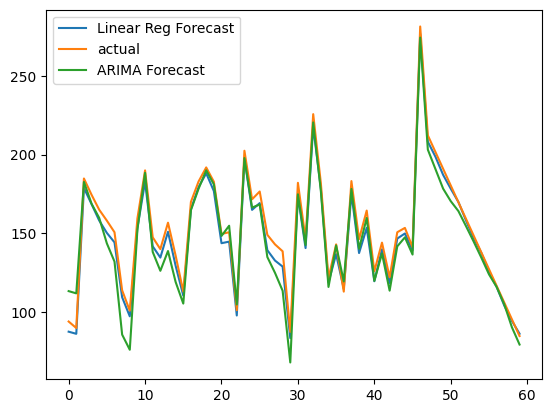

In [125]:
plt.figure()
plt.plot(y_pred.values, label = 'Linear Reg Forecast')
plt.plot(y_test.values, label = 'Actual')
plt.plot(results[results['unique_id']==site_id]['y_pred'].values, label = "ARIMA Forecast")
plt.legend()
plt.show()